In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv("nigeria_houses_data.csv")

In [5]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [6]:
data = data[data["price"] < 1000000000]

## Exploratory Data Analysis

In [7]:
data["state"].value_counts()

state
Lagos          17941
Abuja           3403
Ogun             637
Oyo              477
Rivers           436
Imo              246
Anambara         144
Enugu            128
Edo              100
Delta             61
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9
Kogi               8
Cross River        2
Plateau            2
Kano               2
Katsina            2
Bayelsa            2
Borno              2
Niger              1
Name: count, dtype: int64

<Axes: xlabel='state'>

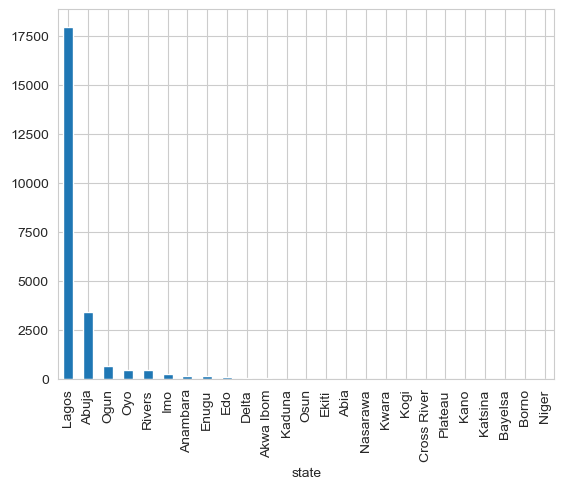

In [8]:
data["state"].value_counts().plot(kind="bar")

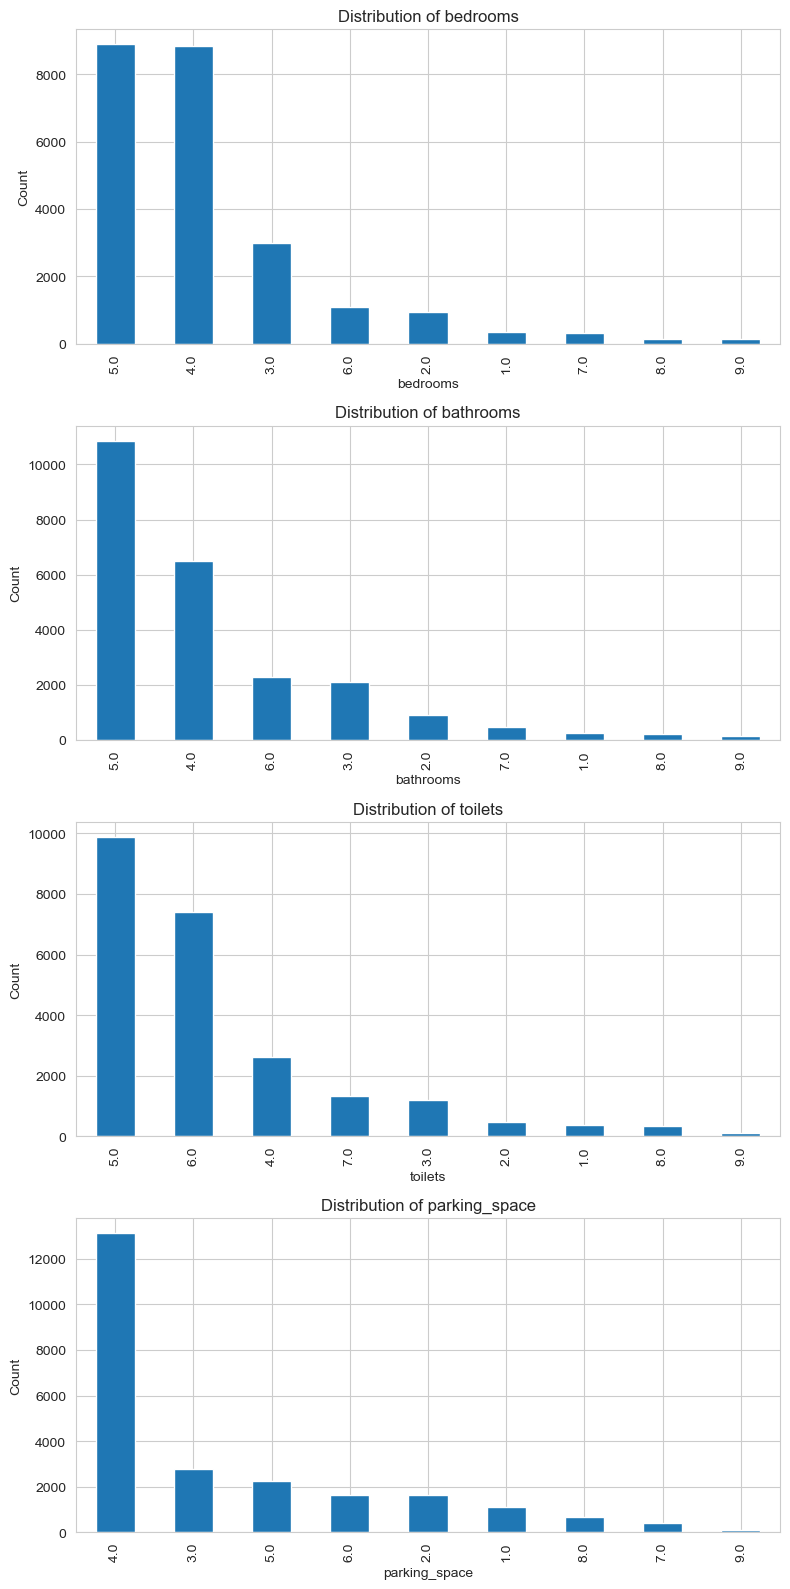

In [7]:
housing_variables = ["bedrooms", "bathrooms", "toilets", "parking_space"]

fig, axes = plt.subplots(len(housing_variables), 1, figsize=(8, 4 * len(housing_variables)))

for i, var in enumerate(housing_variables):
    data[var].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

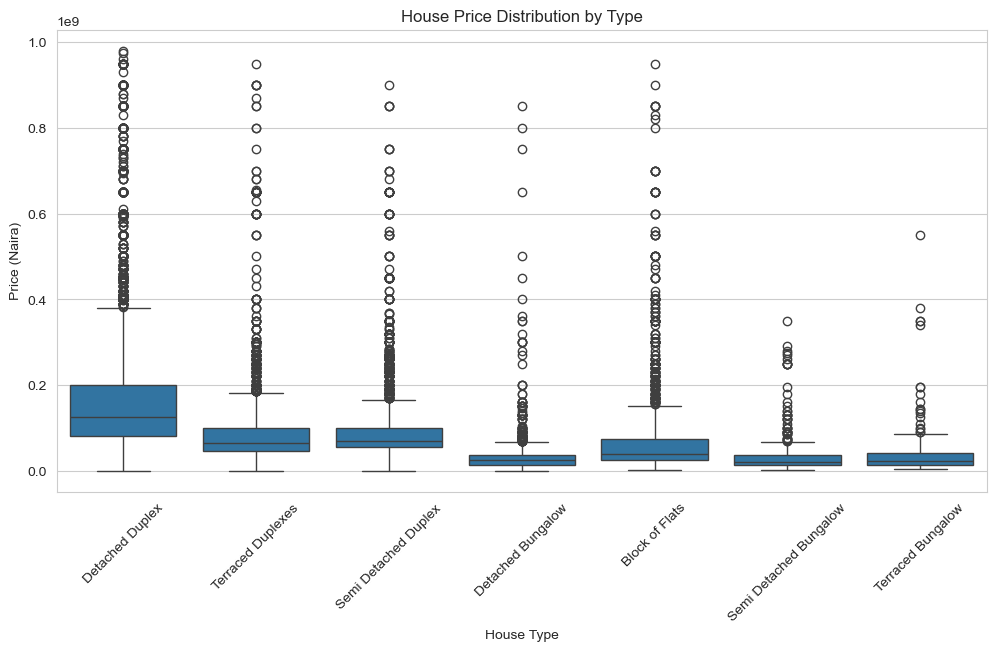

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="title", y="price", data=data)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("House Price Distribution by Type")
plt.xlabel("House Type")
plt.ylabel("Price (Naira)")
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Detached Duplex'),
  Text(1, 0, 'Terraced Duplexes'),
  Text(2, 0, 'Semi Detached Duplex'),
  Text(3, 0, 'Detached Bungalow'),
  Text(4, 0, 'Block of Flats'),
  Text(5, 0, 'Semi Detached Bungalow'),
  Text(6, 0, 'Terraced Bungalow')])

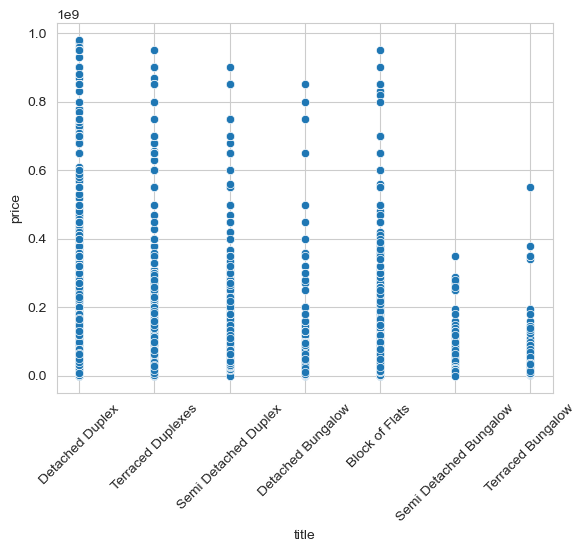

In [9]:
sns.scatterplot(data=data,x='title',y='price')
plt.xticks(rotation=45)

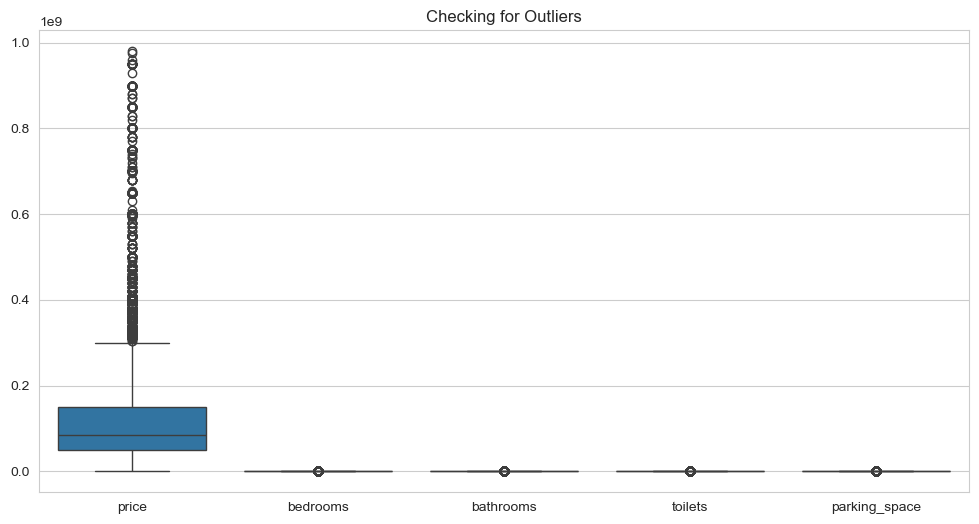

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[["price", "bedrooms", "bathrooms", "toilets", "parking_space"]])
plt.title("Checking for Outliers")
plt.show()

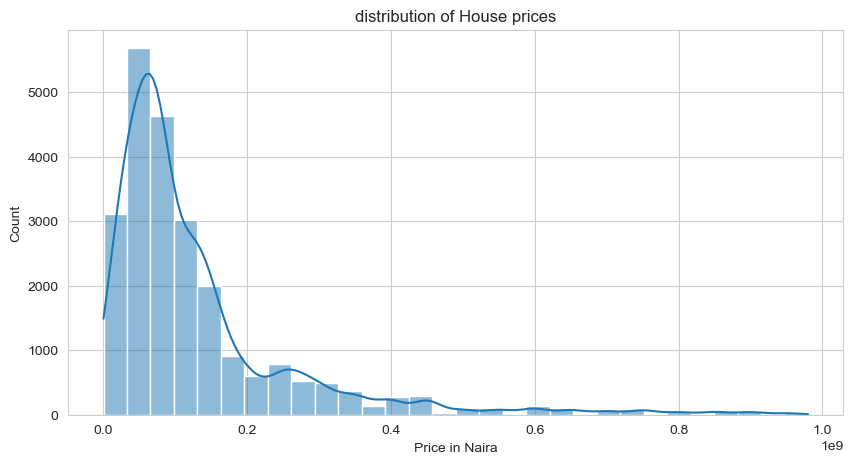

In [11]:
# Seeing the price distribution

plt.figure(figsize=(10, 5))
sns.histplot(data["price"], bins=30, kde=True)
plt.title("distribution of House prices")
plt.xlabel("Price in Naira")
plt.show()

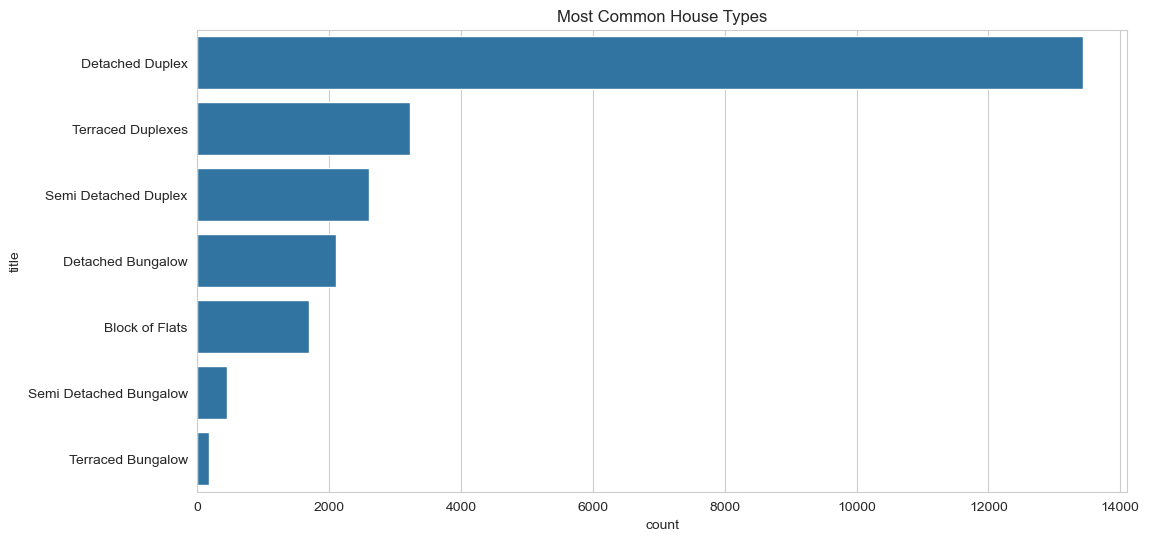

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data["title"], order=data["title"].value_counts().index)
plt.title("Most Common House Types")
plt.show()

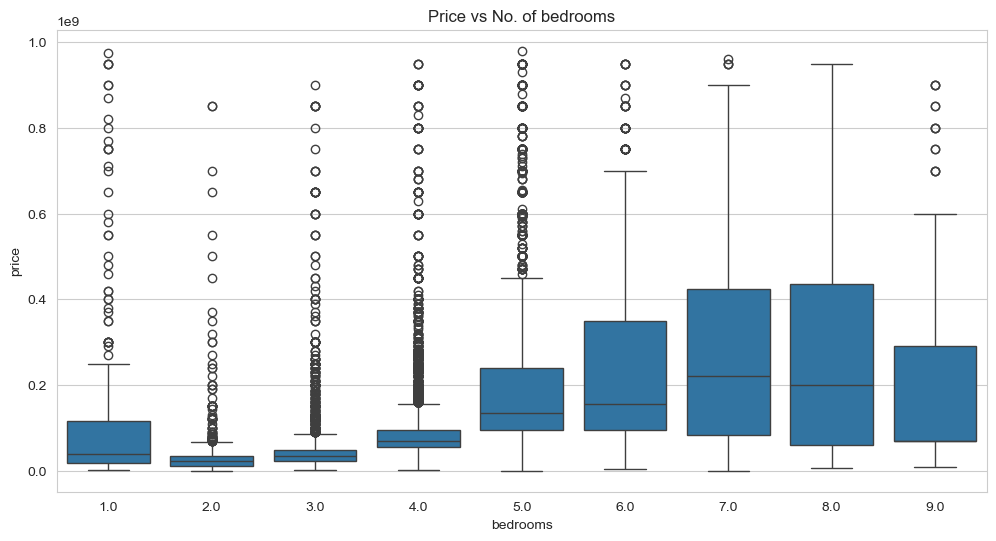

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="bedrooms", y="price", data=data)
plt.title("Price vs No. of bedrooms")
plt.show()

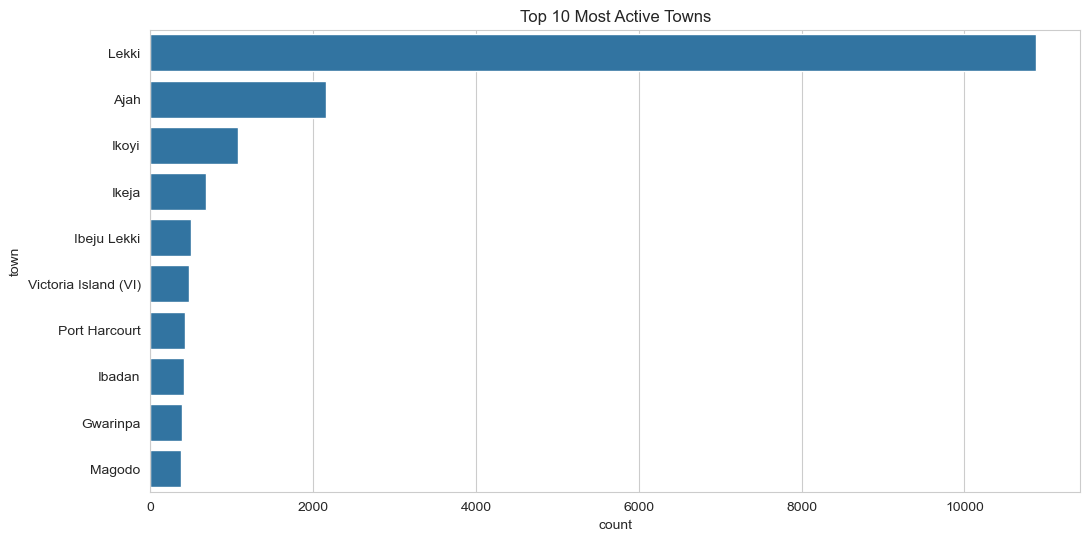

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y=data["town"], order=data["town"].value_counts().index[:10])  # Top 10 towns
plt.title("Top 10 Most Active Towns")
plt.show()

In [15]:
numerical_data = data[["bedrooms", "bathrooms", "toilets", "parking_space", "price"]]

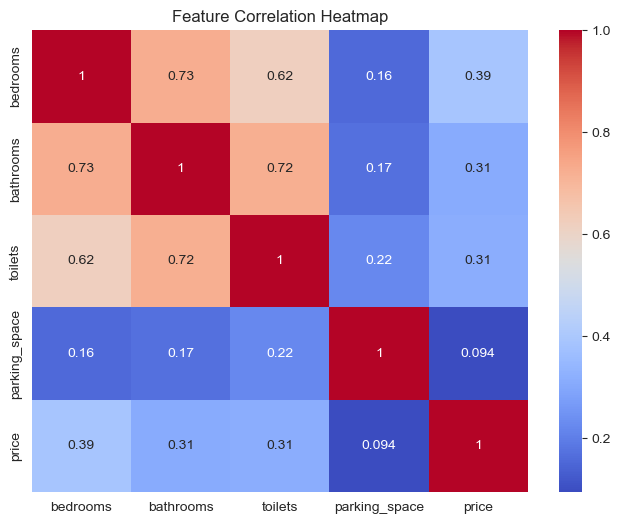

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

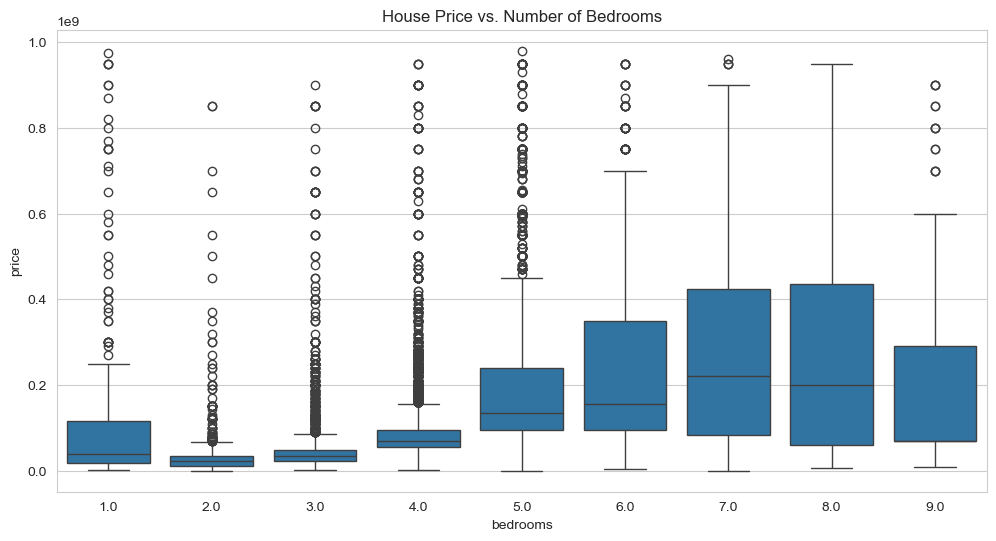

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="bedrooms", y="price", data=data)
plt.title("House Price vs. Number of Bedrooms")
plt.show()

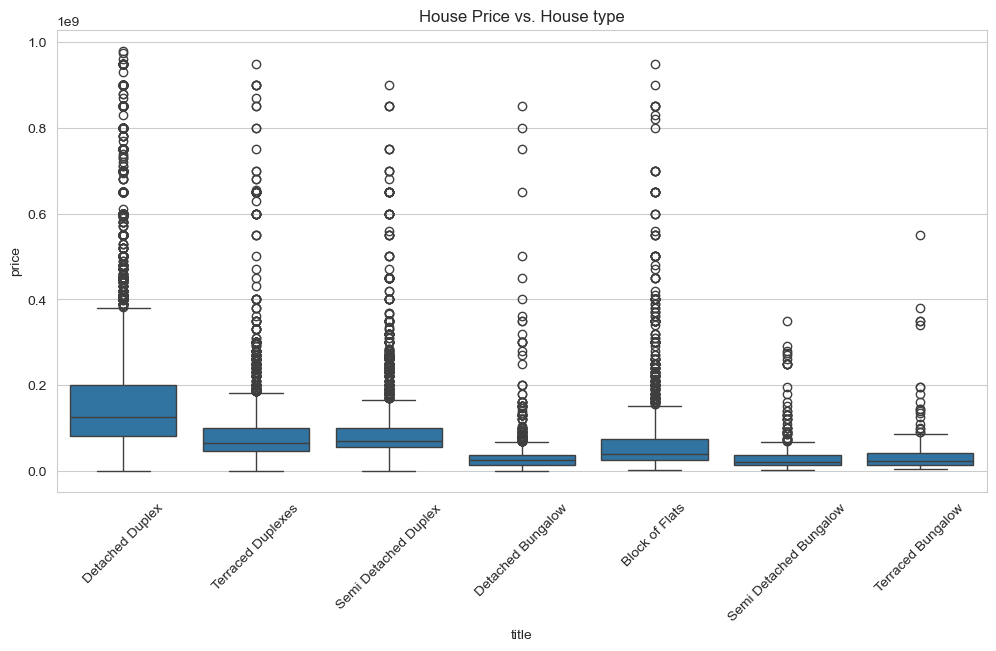

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="title", y="price", data=data)
plt.title("House Price vs. House type")
plt.xticks(rotation=45)
plt.show()

In [19]:
# data["log_price"] = np.log1p(data["price"])
data = data.assign(log_price=np.log1p(data["price"]))

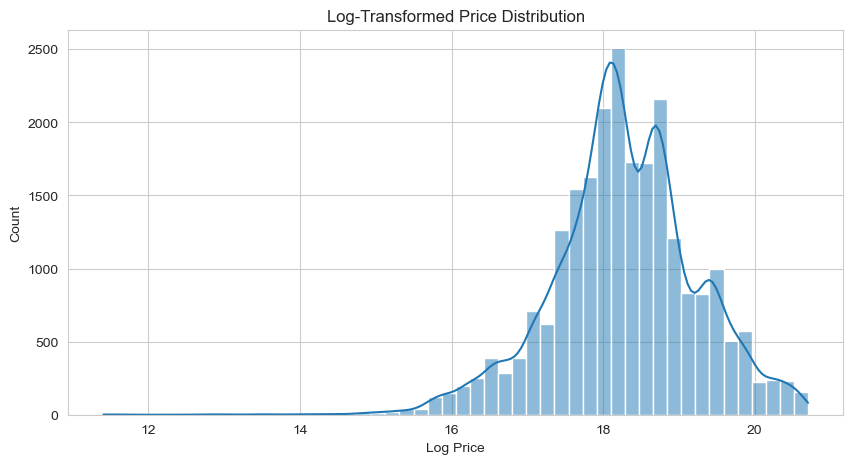

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data["log_price"], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log Price")
plt.show()

## Feature Engineering 

In [21]:
# Finding the price per bedroom
data["price_per_bedroom"] = data["price"] / data["bedrooms"]

In [22]:
data["total_faclities"] = data["bedrooms"] + data["bathrooms"] + data["toilets"] + data["parking_space"]
data["total_faclities"][data["title"] == "Semi Detached Duplex"].mean()

17.497499038091572

### Encoding Categorical Variables

In [23]:
data_encoded = pd.get_dummies(data, columns=["title", "town", "state"], drop_first=True)

In [24]:
data_encoded

,bedrooms,bathrooms,toilets,parking_space,price,log_price,price_per_bedroom,total_faclities,title_Detached Bungalow,title_Detached Duplex,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,450000000.0,19.924758,75000000.0,20.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4.0,5.0,5.0,4.0,800000000.0,20.500122,200000000.0,18.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,5.0,5.0,4.0,120000000.0,18.603002,30000000.0,18.0,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4.0,4.0,5.0,6.0,40000000.0,17.504390,10000000.0,19.0,False,True,...,False,False,True,False,False,False,False,False,False,False
4,4.0,4.0,5.0,2.0,75000000.0,18.132999,18750000.0,15.0,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,15000000.0,16.523561,7500000.0,10.0,False,False,...,False,False,False,False,False,False,False,False,False,False
24322,4.0,5.0,5.0,4.0,25000000.0,17.034386,6250000.0,18.0,False,False,...,False,False,False,False,False,True,False,False,False,False
24323,4.0,5.0,5.0,4.0,68000000.0,18.035018,17000000.0,18.0,False,True,...,False,False,True,False,False,False,False,False,False,False
24324,3.0,4.0,4.0,3.0,78000000.0,18.172219,26000000.0,14.0,False,False,...,False,False,True,False,False,False,False,False,False,False


## Building the Model

### Preparing the Data For Modelling and Training

In [25]:
X = data_encoded.drop(["price", "log_price"], axis=1)
y = data_encoded["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
# Calculating Error Metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Score (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.43
R-Squared Score (R²): 0.80


## Trying out the Model

In [29]:
# Define new house data
new_house = {
    "bedrooms": 6,
    "bathrooms": 6,
    "toilets": 8,
    "parking_space": 4,
    "title": "Semi Detached Duplex",
    "town": "Victoria Island (VI)",
    "state": "Lagos"
}

# Create DataFrame
new_house_data = pd.DataFrame([new_house])

# Add calculated features
new_house_data['price_per_bedroom'] = 0  # Placeholder
new_house_data['total_facilities'] = (
    new_house_data['bedrooms'] + new_house_data['bathrooms'] +
    new_house_data['toilets'] + new_house_data['parking_space']
)

# Encode categorical variables
new_house_data_encoded = pd.get_dummies(new_house_data, columns=["title", "town", "state"])

# Create a new DataFrame with required columns
# Instead of adding columns one by one (which causes fragmentation)
# First, create a dictionary with the missing columns
missing_cols_dict = {col: [0] for col in set(X.columns) - set(new_house_data_encoded.columns)}

# Create a DataFrame from the dictionary
missing_cols_df = pd.DataFrame(missing_cols_dict)

# Concatenate horizontally (along columns)
new_house_data_complete = pd.concat([new_house_data_encoded, missing_cols_df], axis=1)

# Select only the columns needed for prediction (in correct order)
new_house_data_final = new_house_data_complete[X.columns]

# Make prediction
predicted_price_log = model.predict(new_house_data_final)
predicted_price = np.expm1(predicted_price_log)[0]  # Extract single value

# Format price output
formatted_price = f"₦{predicted_price:,.2f}"
print("Predicted Price:", formatted_price)

Predicted Price: ₦36,637,735.22


In [30]:
data["title"].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [31]:
print(sorted(data["town"].unique().tolist()))

['Aba', 'Abeokuta North', 'Abeokuta South', 'Abraka', 'Ado-Ekiti', 'Ado-Odo/Ota', 'Afijio', 'Agbara', 'Agbara-Igbesa', 'Agege', 'Ajah', 'Akinyele', 'Akure', 'Alimosho', 'Amuwo Odofin', 'Aniocha South', 'Apapa', 'Apo', 'Arepo', 'Asaba', 'Asokoro District', 'Ayobo', 'Badagry', 'Bwari', 'Calabar', 'Central Business District', 'Chikun', 'Dakibiyu', 'Dakwo', 'Danja', 'Dape', 'Dei-Dei', 'Dekina', 'Diplomatic Zones', 'Duboyi', 'Durumi', 'Dutse', 'Ede South', 'Egbe', 'Egbeda', 'Egor', 'Ejigbo', 'Eket', 'Eko Atlantic City', 'Eleme', 'Enugu', 'Epe', 'Ethiope West', 'Ewekoro', 'Gaduwa', 'Galadimawa', 'Garki', 'Gbagada', 'Gudu', 'Guzamala', 'Guzape District', 'Gwagwalada', 'Gwarinpa', 'Ibadan', 'Ibadan North', 'Ibadan North-East', 'Ibadan North-West', 'Ibadan South-West', 'Ibafo', 'Ibarapa North', 'Ibeju', 'Ibeju Lekki', 'Idimu', 'Ido', 'Idu Industrial', 'Ifako-Ijaiye', 'Ifo', 'Ijaiye', 'Ijebu Ode', 'Ijede', 'Ijesha', 'Ijoko', 'Ikeja', 'Ikorodu', 'Ikot Ekpene', 'Ikotun', 'Ikoyi', 'Ikpoba Okha', 'I

In [34]:
scraped_data = pd.read_csv("nigeria_properties_first.csv")
scraped_data

,type of house,location,price,bedrooms,bathrooms,toilets,parking_space
0,4 bedroom terraced duplex for sale,"Chevron, Lekki, Lagos","₦200,000,000",4.0,4.0,5.0,2.0
1,5 bedroom detached duplex for sale,"Ikate, Lekki, Lagos","₦750,000,000",5.0,5.0,6.0,NaN
2,4 bedroom detached duplex for sale,"Oral Estate, Ikota, Lekki, Lagos","₦180,000,000",4.0,5.0,5.0,NaN
3,5 bedroom detached duplex for sale,"Lekki County, Ikota, Lekki, Lagos","₦230,000,000",5.0,5.0,6.0,9.0
4,4 bedroom semi-detached duplex for sale,"Ikota, Lekki, Lagos","₦180,000,000",4.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...
795,5 bedroom detached duplex for sale,"Omole Phase 1, Ikeja, Lagos","₦530,000,000",5.0,5.0,6.0,4.0
796,3 bedroom semi-detached duplex for sale,"Magodo Phase 1, Olowora, Magodo, Lagos","₦130,000,000",3.0,3.0,3.0,2.0
797,Mixed-use land for sale,"Off Funnab Road Alabata, Abeokuta South, Ogun","₦3,000,000",NaN,NaN,NaN,NaN
798,5 bedroom semi-detached duplex for sale,"Magodo Gra Phase 2, GRA Phase 2, Magodo, Lagos","₦350,000,000",5.0,5.0,6.0,3.0
